In [1]:
import re, sys, math
import glob
import random
import json
import os 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from collections import OrderedDict
import pandas as pd
from helper_utilities import *
from helper_plotutilities import *
from unet_model  import *
from unet_predict_sk import *

%matplotlib inline

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.



Successfully imported packages!!!

START: 1526776770.434395

Successfully imported packages!!!



In [2]:
# result_path = '/masvol/heartsmart/unet_model/method2type2/results'
# result_list = [os.path.join(dirpath, f)
#     for dirpath, dirnames, files in os.walk(result_path)
#     for f in fnmatch.filter(files, '*2_2_176*_predictions.npy')]

# result_list

In [3]:
from collections import OrderedDict
keys = ["samples", "logloss", "weighted_logloss","accuracy", "weighted_accuracy", "precision","recall", "f1_score", "true_positive", \
       "false_positive","true_negative","false_negative", "zero_contour_labels", "zero_contour_pred", \
       "missed_pred_lt_05", "missed_pred_gt_25", "missed_pred_gt_50", "missed_pred_eq_100"]

In [4]:
#explist256 = ['combined_1_3_256_epoch20', 'combined_1_3_256', 'combined_aug_1_3_256',\
# 'combined_drop_1_3_256','combined_aug_drop_1_3_256']
explist256 = [ 'combined_2_2_256','combined_drop_2_2_256', 'pixnorm256/combined_2_2_256_pixnorm']

In [5]:
explist176 = ['combined_2_2_176', 'combined_aug_2_2_176','combined_drop_2_2_176', 'combined_drop_aug_2_2_176']

In [ ]:
# ##################
# ## run prediction using pre-trained weights
# ################

# RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type2/results/'
# image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"

# for results_file in explist176 :
#     m_name = results_file
#     pred_file = RESULTS_PATH + results_file + '_predictions.npy'
#     weights_file = RESULTS_PATH + results_file + '.hdf5'
#     print ("weights file", weights_file)
#     print ("pred_file", pred_file)


#     mnet = predict_with_pretrained_weights(model_name=m_name, nGPU=0, model_file=weights_file, image_size = 176, \
#                                 test_image_file = image_file)
#     #mnet.save_model_info(mpath)
#     print ("Saving predictions")
#     np.save(pred_file, mnet.predictions)

In [6]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type2/results/'
label_file176 = '/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy'

df176 = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist176 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics(label_file176, pred_file)
    df176[results_file]= df176['Attribute'].map(perf)


In [7]:
df176

,Attribute,combined_2_2_176,combined_aug_2_2_176,combined_drop_2_2_176,combined_drop_aug_2_2_176
0,samples,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
1,logloss,1.668610e-02,1.746831e-02,1.425868e-02,1.614875e-02
2,weighted_logloss,1.714403e-01,2.298210e-01,1.921661e-01,2.135686e-01
3,accuracy,9.834523e-01,9.826834e-01,9.858425e-01,9.839809e-01
4,weighted_accuracy,8.424506e-01,7.946759e-01,8.251698e-01,8.076967e-01
5,precision,9.512601e-01,9.629766e-01,9.657977e-01,9.626659e-01
6,recall,9.559645e-01,9.425842e-01,9.428273e-01,9.434112e-01
7,f1_score,9.536065e-01,9.526713e-01,9.541743e-01,9.529413e-01
8,true_positive,4.010950e+05,3.954810e+05,3.955830e+05,3.958280e+05
9,false_positive,2.055100e+04,1.520500e+04,1.400900e+04,1.535100e+04


In [17]:
file_name = '/masvol/heartsmart/unet_model/method2type2/results/2_2_176_perf_comparison.csv'
df176.to_csv(file_name )

In [18]:
df1 = pd.read_csv(file_name,index_col=0)
df1

,Attribute,combined_2_2_176,combined_aug_2_2_176,combined_drop_2_2_176,combined_drop_aug_2_2_176
0,samples,2.700000e+02,2.700000e+02,2.700000e+02,2.700000e+02
1,logloss,1.668610e-02,1.746831e-02,1.425868e-02,1.614875e-02
2,weighted_logloss,1.714403e-01,2.298210e-01,1.921661e-01,2.135686e-01
3,accuracy,9.834523e-01,9.826834e-01,9.858425e-01,9.839809e-01
4,weighted_accuracy,8.424506e-01,7.946759e-01,8.251698e-01,8.076967e-01
5,precision,9.512601e-01,9.629766e-01,9.657977e-01,9.626659e-01
6,recall,9.559645e-01,9.425842e-01,9.428273e-01,9.434112e-01
7,f1_score,9.536065e-01,9.526713e-01,9.541743e-01,9.529413e-01
8,true_positive,4.010950e+05,3.954810e+05,3.955830e+05,3.958280e+05
9,false_positive,2.055100e+04,1.520500e+04,1.400900e+04,1.535100e+04


In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type2/results/'
label_file176 = '/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy'

perf176_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist176 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics2(label_file176, pred_file)
    perf176_df[results_file]= perf176_df['Attribute'].map(perf)
    

In [ ]:
RESULTS_PATH = '/masvol/heartsmart/unet_model/method2type2/results/'
label_file256 = '/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_256_test_labels.npy'

perf_df = pd.DataFrame( keys, columns=["Attribute"] )
for results_file in explist256 :
    pred_file = RESULTS_PATH + results_file + '_predictions.npy'
    perf = compute_performance_statistics2(label_file256, pred_file)
    perf_df[results_file]= perf_df['Attribute'].map(perf)
   
    
   
        

In [ ]:
perf_df

In [ ]:
perf176_df

In [ ]:
for results_file in explist256 :
    history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_accuracy_and_loss(history_file)
    

In [ ]:
for results_file in explist176 :
    history_file = RESULTS_PATH + results_file + '_learning_history.json'
    print ('='*30)
    print ('='*30)
    print ("Learning history of :" + results_file)
    print ('-'*30)
    
    plot_accuracy_and_loss(history_file)

In [ ]:
# label_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_predictions.npy"
# y_true_f = np.load(label_file)
# y_pred_f = np.load(pred_file)
# p = get_performance_statistics(y_true_f, y_pred_f)
# print (p)

In [ ]:
# perf_file = "perf_values.json"
# print ("Saving Performance values", perf_file)
# with open(perf_file, 'w') as file:
#     json.dump(p, file, indent=2)
# print('-'*30)

## Analysis on training with 256x256  combined data set (ACDC + Sunnybrook)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_2_2_256_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_2_2_256_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
#find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [21, 84, 127, 220]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


In [ ]:
def find_outliers_test(y_true_f, y_pred_f):
    y_true = np.load(y_true_f)
    y_pred_s = np.load(y_pred_f)
    samples, x, y, z = y_true.shape
    print ("Number of Samples : %d, image size : %d x %d "%(samples, x, y))
    y_pred = np.round(y_pred_s)
    print (y_true[0])
    print (y_true[0].sum(axis=(1,2)))
    y_true_sum = y_true.sum(axis=(1, 2), keepdims=True).reshape(samples)
    print (len(y_true_sum))
    print (np.where(y_true_sum ==0))

In [ ]:
find_outliers_test(label_file, pred_file)

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_256_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_256_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_256_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_256_predictions.npy"
plot_accuracy_and_loss(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [21, 84, 127, 220]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# history_file = "/masvol/heartsmart/unet_model/data/baseline/combined_drop_1_3_256_learning_history.json"
# image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_drop_1_3_256_predictions.npy"
# plot_accuracy_and_loss(history_file)
# perf = compute_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [11, 127, 165, 184, 192, 204, 217, 229]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# history_file = "/masvol/heartsmart/unet_model/data/baseline/combined_aug_drop_1_3_256_learning_history.json"
# image_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/data/baseline/combined_1_3_256_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/data/baseline/combined_aug_drop_1_3_256_predictions.npy"
# plot_accuracy_and_loss(history_file)
# perf = compute_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [11, 21, 22, 127, 192, 204, 217, 220]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

## Analysis on training with 176x176  combined data set (ACDC + Sunnybrook)
### Below are the results of 4 tests
1. Training with combined dataset
2. Training with combined dataset + Augmentation
3. Training with combined dataset (no augmentation),  using Unet with dropout layers
4. Training with combined dataset + Augmentation,  using Unet with dropout layers

In [ ]:
history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_2_2_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_2_2_176_predictions.npy"
plot_learning_history(history_file)
perf = compute_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)


------------------------------
Model Parameters
------------------------------
Evaluation on Test set
------------------------------
Values at first and last epoch
------------------------------
val_loss  :  0.09976983809324562 , 0.02707413003444061
loss  :  0.09800310712737753 , 0.005237644547840275
val_dice_coeff  :  0.523637269974732 , 0.932946751840779
dice_coeff  :  0.4803670073917691 , 0.9642641990535867
------------------------------
------------------------------


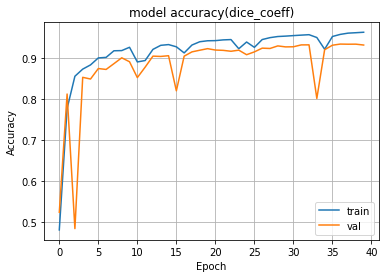

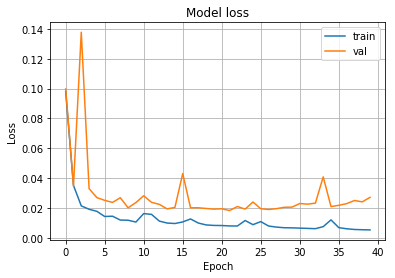

Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [65, 77, 90, 120, 148, 150]
Sample Index of predictions with zero contours [65, 77, 113, 116, 120, 148, 150, 179]
max-sigmoid values with zero contours [0.2987396, 0.0012570375, 0.0003147196, 0.00034286725, 0.0005308343, 0.0003450722, 0.055332627, 0.0036375609]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 10 [6, 65, 69, 74, 77, 108, 120, 148, 150, 169]
Sample Index where missed predictions >25% 31 [12, 16, 25, 28, 35, 39, 70, 84, 90, 92, 96, 97, 99, 101, 112, 113, 116, 147, 164, 179, 190, 197, 205, 209, 213, 229, 230, 242, 243, 246, 259]
Sample Index where missed predictions >50% 15 [16, 25, 28, 35, 70, 90, 96, 97, 99, 112, 113, 116, 164, 179, 259]
Sample Index where missed predictions >= 100% 6

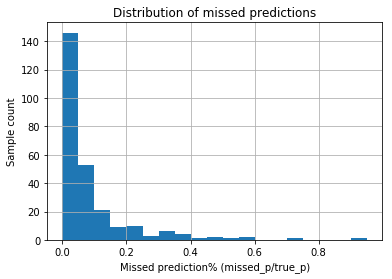

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


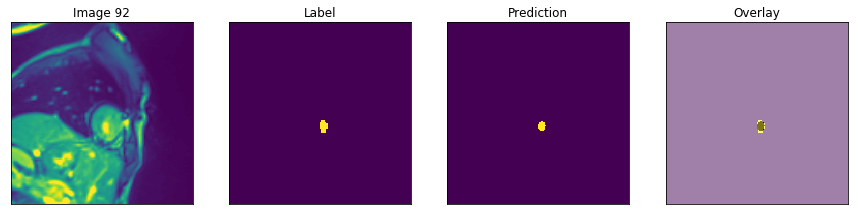

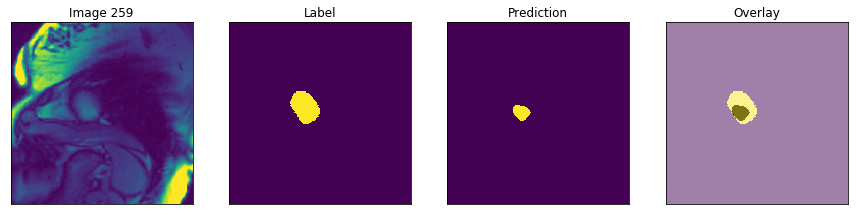

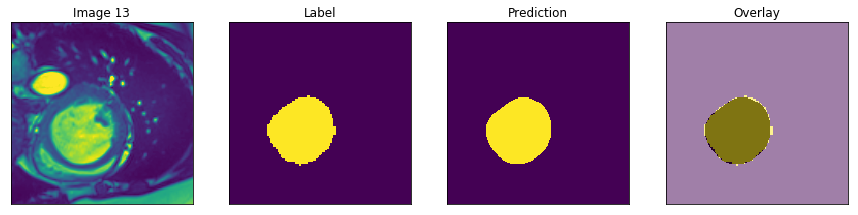

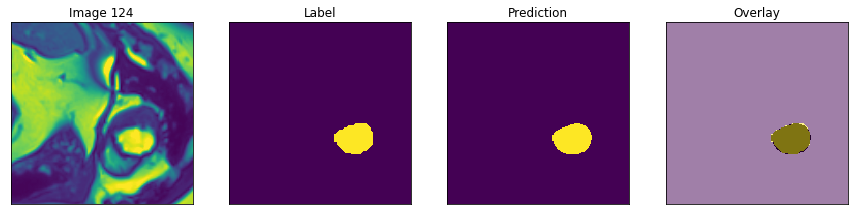

------------------------------
------------------------------


In [10]:
history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_176_predictions.npy"
plot_learning_history(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
# zcontour = [68, 130, 141, 173, 188, 191, 226]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

samples, max, min  270 1.0 0.0


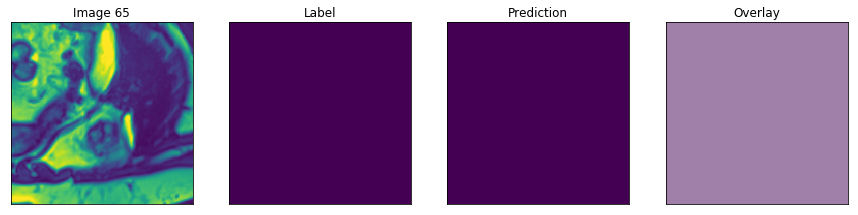

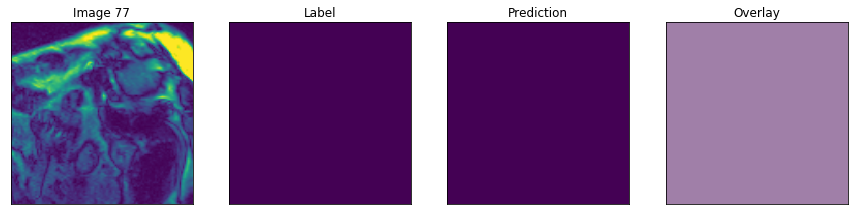

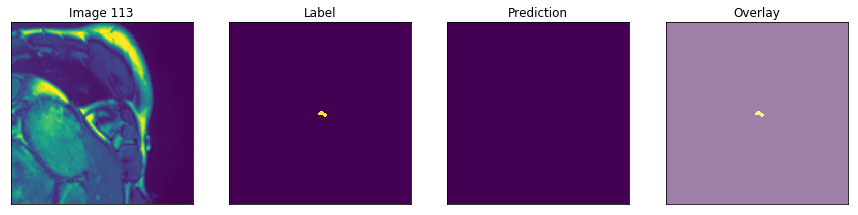

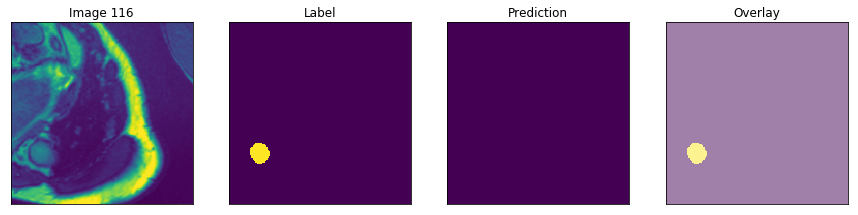

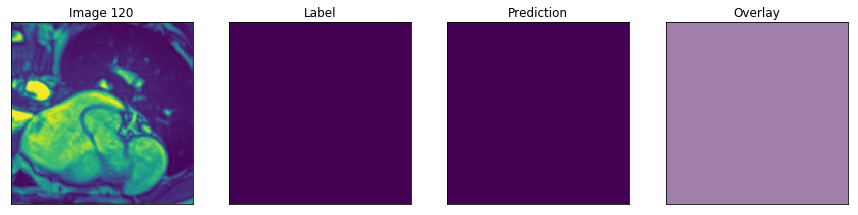

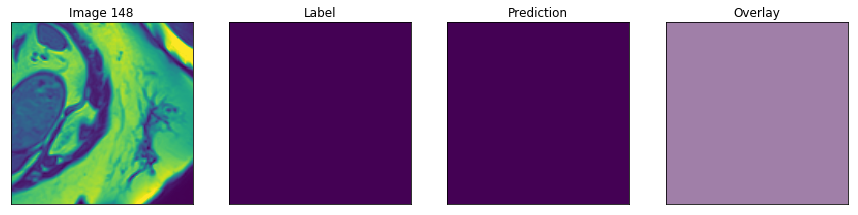

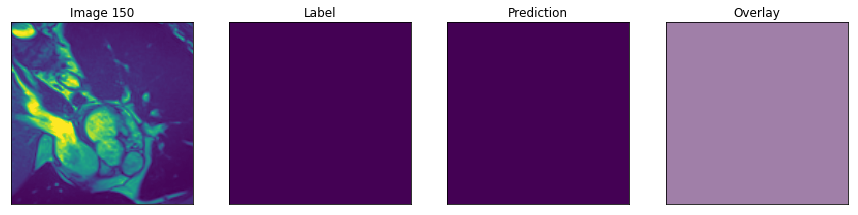

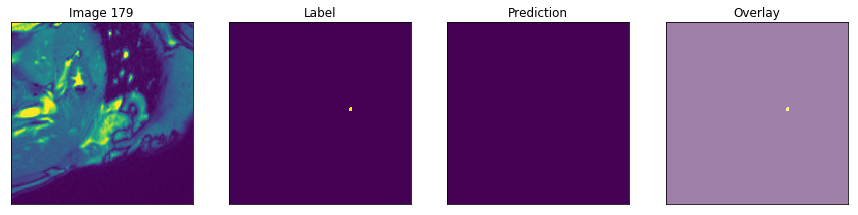

In [13]:
zcontour = [65, 77, 113, 116, 120, 148, 150, 179]
display_images_labels_predictions (image_file, label_file,  pred_file, image_list = zcontour)

samples, max, min  270 1.0 0.0


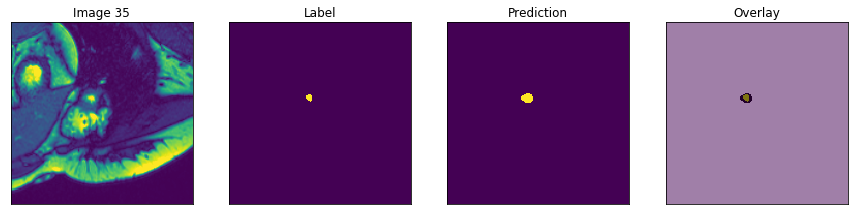

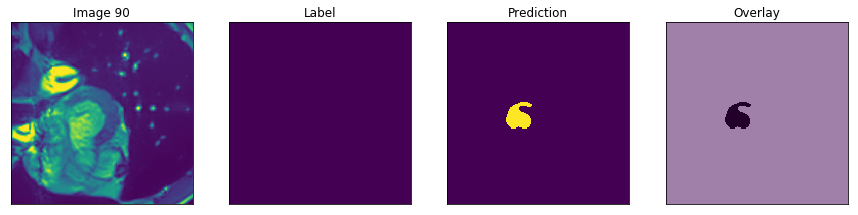

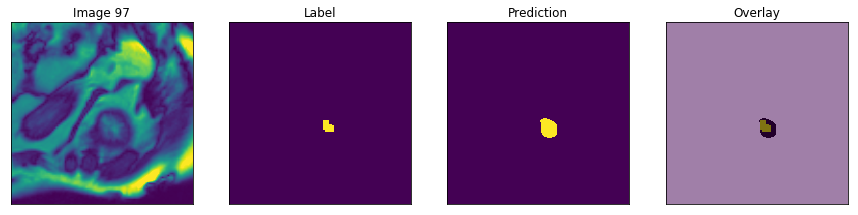

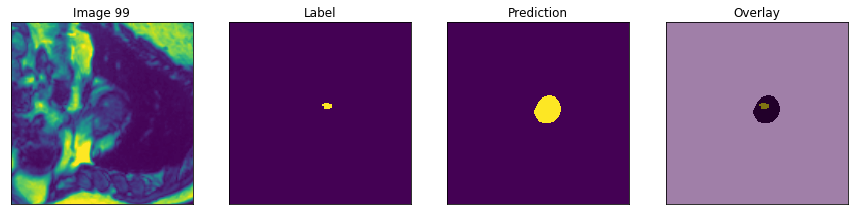

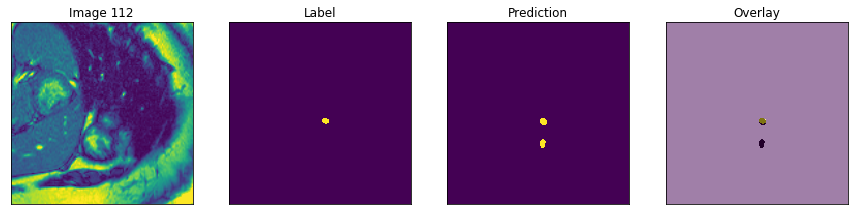

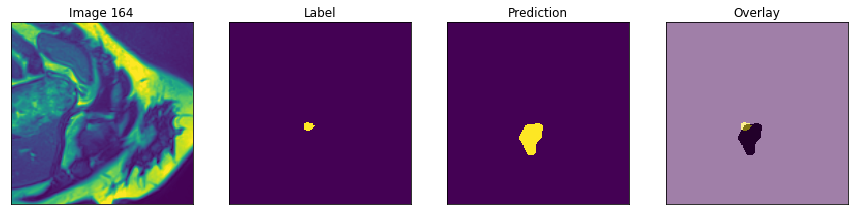

In [14]:
zcontour = [35, 90, 97, 99, 112, 164]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

------------------------------
Model Parameters
------------------------------
Evaluation on Test set
------------------------------
Values at first and last epoch
------------------------------
val_loss  :  0.09571086264169607 , 0.02872450234460049
loss  :  0.1013889871327433 , 0.004505570927035616
val_dice_coeff  :  0.5104925628812587 , 0.9349836897654612
dice_coeff  :  0.4689351134094194 , 0.969149342342913
------------------------------
------------------------------


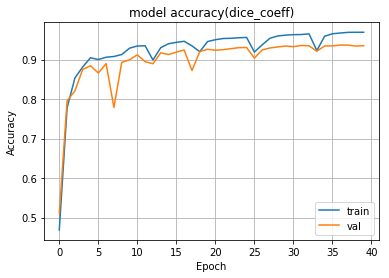

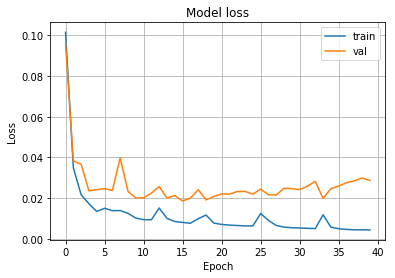

Number of Samples : 270, image size : 176 x 176 
------------------------------
Outliers
------------------------------
Sample Index of labels with zero contours [65, 77, 90, 120, 148, 150]
Sample Index of predictions with zero contours [70, 77, 113, 116, 120, 148, 150, 179, 259]
max-sigmoid values with zero contours [0.009702885, 0.005679621, 0.04210453, 0.0036760333, 0.01342742, 0.011796861, 0.012406276, 0.38304615, 0.34555304]
(270,)
------------------------------
Statistics on missed predictions of contour pixels (white pixels)
------------------------------
Sample Index where missed predictions <.05% 6 [77, 120, 148, 150, 173, 174]
Sample Index where missed predictions >25% 28 [12, 16, 17, 28, 35, 39, 65, 70, 84, 90, 92, 96, 97, 99, 112, 113, 116, 143, 164, 179, 197, 205, 209, 229, 242, 243, 246, 259]
Sample Index where missed predictions >50% 19 [16, 28, 35, 39, 65, 70, 90, 96, 97, 99, 112, 113, 116, 164, 179, 197, 229, 242, 259]
Sample Index where missed predictions >= 100% 7 [1

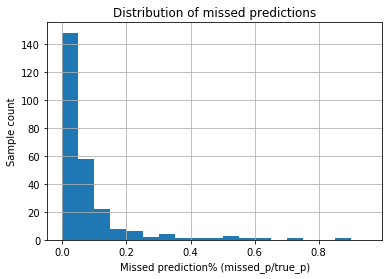

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


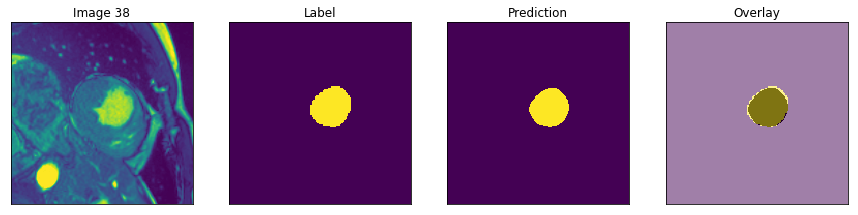

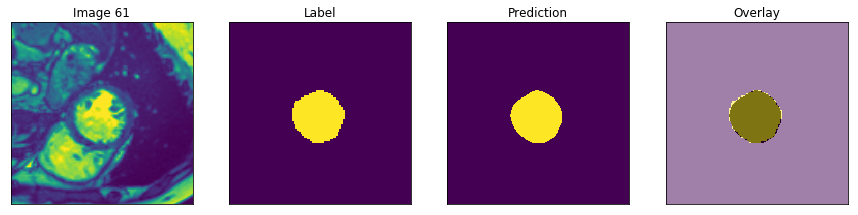

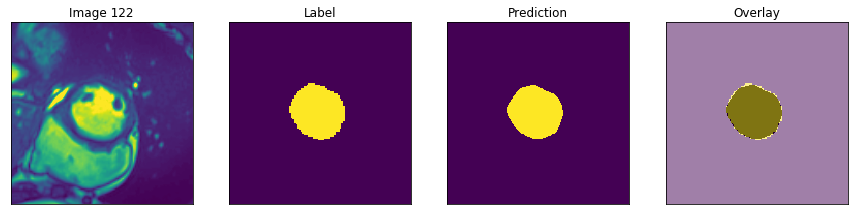

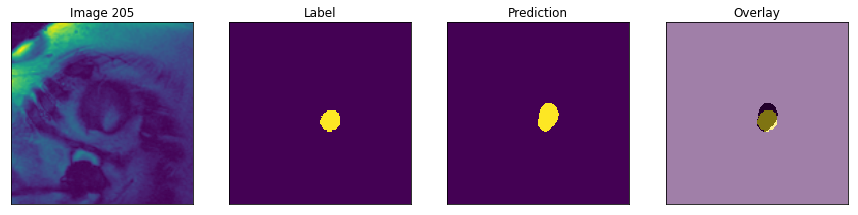

------------------------------
------------------------------
samples, max, min  270 1.0 0.0


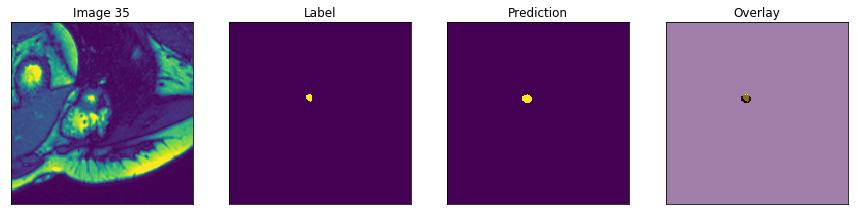

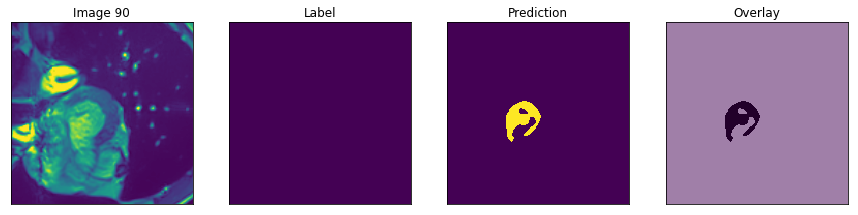

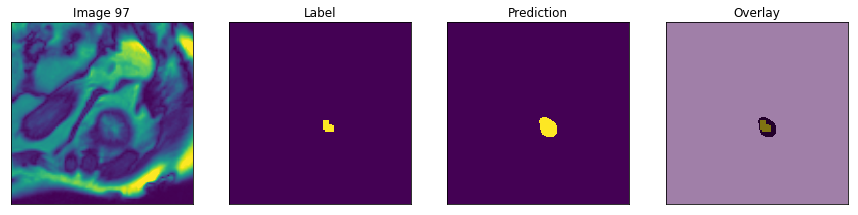

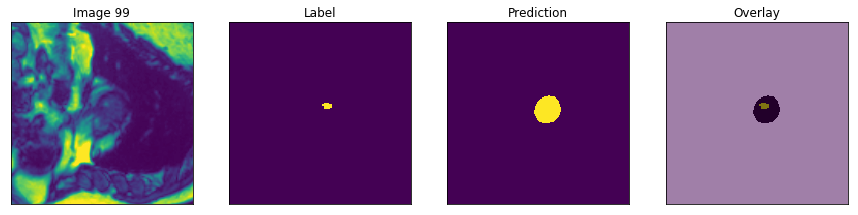

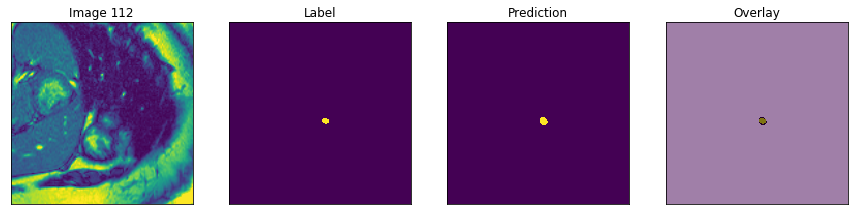

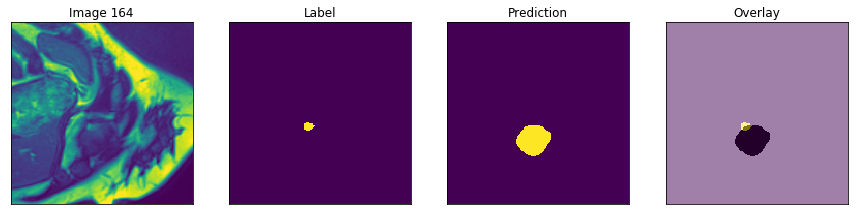

In [15]:
history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_aug_2_2_176_learning_history.json"
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"
label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_aug_2_2_176_predictions.npy"
plot_learning_history(history_file)
perf = compute_performance_statistics(label_file, pred_file)
find_outliers(label_file, pred_file)
display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
print('-'*30)
print('-'*30)
zcontour = [35, 90, 97, 99, 112, 164]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

samples, max, min  270 1.0 0.0


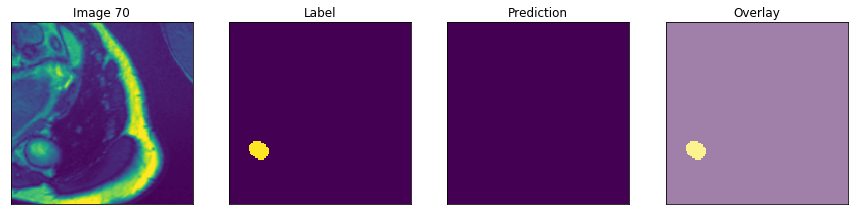

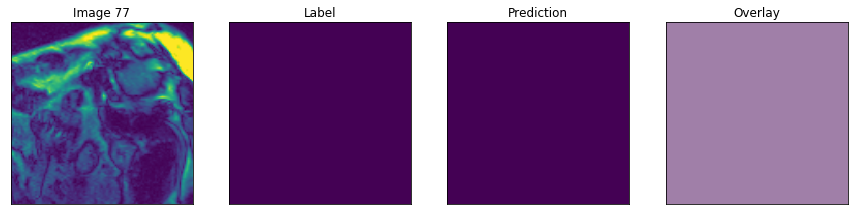

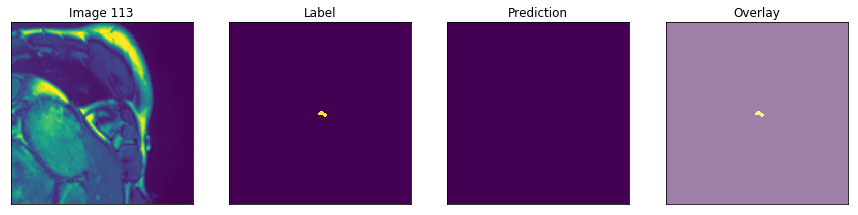

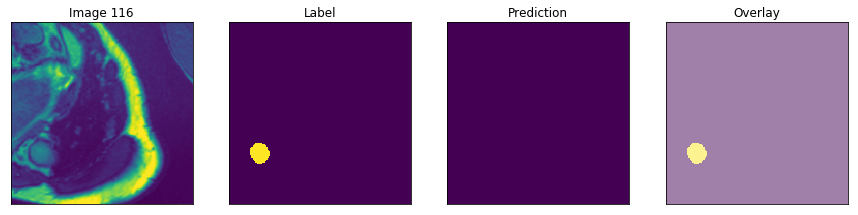

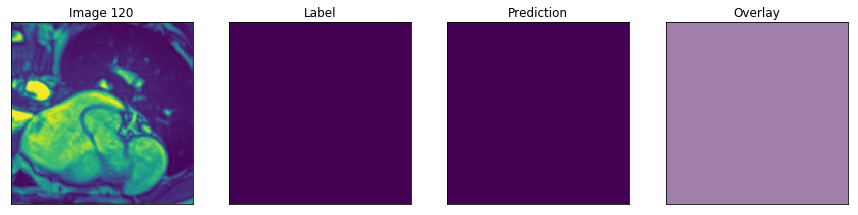

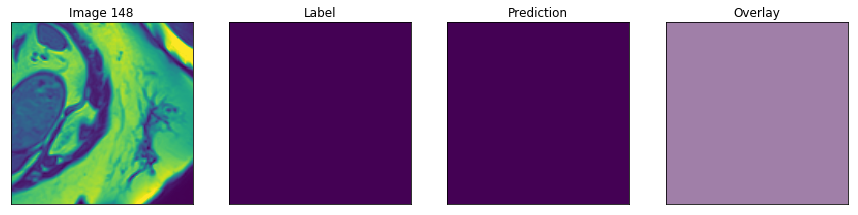

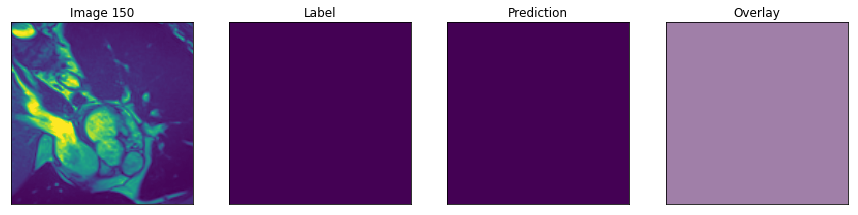

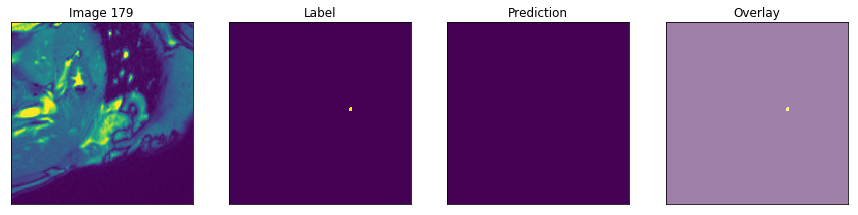

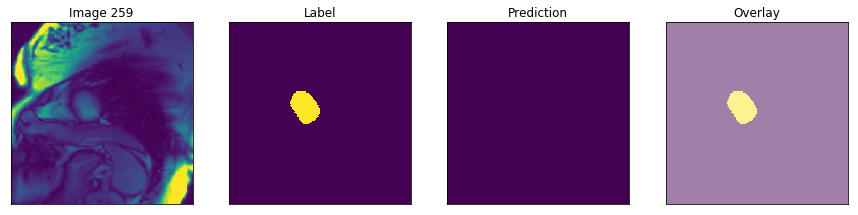

In [16]:
zcontour = [70, 77, 113, 116, 120, 148, 150, 179, 259]
display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_176_learning_history.json"
# image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_176_predictions.npy"
# plot_accuracy_and_loss(history_file)
# perf = compute_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
# history_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_aug_2_2_176_learning_history.json"
# image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"
# label_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_labels.npy"
# pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_aug_2_2_176_predictions.npy"
# plot_accuracy_and_loss(history_file)
# perf = compute_performance_statistics(label_file, pred_file)
# find_outliers(label_file, pred_file)
# display_images_labels_predictions (image_file, label_file, pred_file, num_images = 4, random_images = True)
# print('-'*30)
# print('-'*30)
# zcontour = [47, 68, 81, 82, 141, 155, 173, 202, 213]
# display_images_labels_predictions (image_file, label_file, pred_file, image_list = zcontour)

In [ ]:
## 

## Analysis of predictions on  DSB data set (256x256  images)

In [ ]:
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_256_test_images.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_2_2_256_predictions.npy"
find_outliers_in_prediction(pred_file)
display_images_predictions (image_file, pred_file, num_images = 4, random_images = False)
print ("-"*30)
imglist = [21, 84, 127]
display_images_predictions (image_file, pred_file, image_list = imglist)


## Analysis of predictions on  DSB data set (176x176  images)

In [ ]:
image_file = "/masvol/heartsmart/unet_model/method2type2/data/combined_2_2_176_test_images.npy"
pred_file = "/masvol/heartsmart/unet_model/method2type2/results/combined_drop_2_2_176_predictions.npy"
find_outliers_in_prediction(pred_file)
display_images_predictions (image_file, pred_file, num_images = 4, random_images = False)
print ("-"*30)
print ("-"*30)
imglist = [21, 84, 127]
display_images_predictions (image_file, pred_file, image_list = imglist)